# ProDS Associate 실기 대비

In [ ]:
# 바탕화면 : 함수 pdf 지원

# Dataset_01

In [ ]:
# =============================================================================
# # 문제 01 유형(DataSet_01.csv 이용)
#
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================

In [1]:
import pandas as pd
# pandas, scipy, numpy, sklearn, statsmodels

In [2]:
dat=pd.read_csv('Dataset/Dataset_01.csv')

## 1.

In [ ]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

### 해설

In [3]:
dat.isna()

,TV,Radio,Social_Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4567,False,False,False,False,False
4568,False,False,False,False,False
4569,False,False,False,False,False
4570,False,False,False,False,False


In [4]:
dat.isna().sum() # 열별 결측치 수 확인 Series (index)

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

In [5]:
# 정답 26 입력
dat.isna().sum().sum()

26

In [6]:
dat.isna().sum(axis=1) # 행별 결측치 수 확인

0       0
1       0
2       0
3       0
4       0
       ..
4567    0
4568    0
4569    0
4570    0
4571    0
Length: 4572, dtype: int64

In [7]:
# 간략하게 확인
dat.isna().any()

TV               True
Radio            True
Social_Media     True
Influencer      False
Sales            True
dtype: bool

In [8]:
dat.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

In [9]:
dat.isna().any(axis=1).sum()

26

## 2.

In [ ]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

In [10]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [12]:
import numpy as np

In [13]:
dat.corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [21]:
np.round(dat.corr(), 4)

,TV,Radio,Social_Media,Sales
TV,1.0000,0.8695,0.5282,0.9995
Radio,0.8695,1.0000,0.6075,0.8691
Social_Media,0.5282,0.6075,1.0000,0.5289
Sales,0.9995,0.8691,0.5289,1.0000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

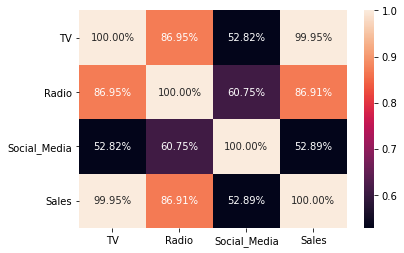

In [23]:
sns.heatmap(dat.corr(), annot=True, fmt='.2%')

### 해설

In [28]:
dat.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [26]:
# 데이터 종류 수치형
# 통계학에서 corr 0.5 이상일 때 관련 높다.
# 결측치 자동으로 제외하고 계산

dat[['TV', 'Radio', 'Social_Media', 'Sales']].corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [27]:
dat[['TV', 'Radio', 'Social_Media', 'Sales']].corr().abs() # 절댓값

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [29]:
Q2 = dat[['TV', 'Radio', 'Social_Media', 'Sales']].corr()
Q2_abs = Q2.abs() # 음수 고려할 경우

In [30]:
Q2_abs['Sales']

TV              0.999497
Radio           0.869105
Social_Media    0.528906
Sales           1.000000
Name: Sales, dtype: float64

In [33]:
Q2_abs['Sales'].sort_values(ascending=False)
# ctrl + i (Spyder 사용시 함수 확인 단축키)

Sales           1.000000
TV              0.999497
Radio           0.869105
Social_Media    0.528906
Name: Sales, dtype: float64

In [34]:
Q2_ans = Q2_abs['Sales'].sort_values(ascending=False)[1]

0.999497444941335

In [31]:
# (비교)
Q2_abs['Sales'].nlargest(2) # Sales 제외한 큰 값

Sales    1.000000
TV       0.999497
Name: Sales, dtype: float64

In [36]:
Q2_abs['Sales'].nlargest(2)[1]

0.999497444941335

## 3.

In [24]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

### 해설

In [ ]:
# 시험에서는 보통 값 하나 입력
# 시험에서 지정한 함수 사용

In [39]:
# !pip install statsmodels

In [41]:
from sklearn.linear_model import LinearRegression # 최적화 GD 방식. 가정X
from statsmodels.api import OLS, add_constant # 절편을 위한 상수항 추가
from statsmodels.formula.api import ols # R 기반

In [43]:
dat1 =  dat.dropna()

In [ ]:
# 조건 만족하도록 설정 후 분석

In [49]:
# lm = LinearRegression(fit_intercept=True).fit(dat.drop(columns='Influencer'), dat.Sales)

# 결측치 제외하고 작동
lm = LinearRegression(fit_intercept=True)
lm.fit(dat1.drop(columns=['Influencer', 'Sales']), dat1.Sales)

LinearRegression()

In [50]:
dir(lm) # attribute, methods 확인

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [51]:
lm.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

In [59]:
sorted(lm.coef_, reverse=True)

[3.562569627119931, 0.004964017947441284, -0.00397038664588853]

In [52]:
# lm.intercept_

-0.13396305194208935

In [ ]:
statsmodels OLS 에서 상수항 여부에 따른 X
(시계열 방식?)

In [65]:
# 상수항 불포함
x = dat1.drop(columns=['Influencer', 'Sales'])
x

,TV,Radio,Social_Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
4567,26.0,4.472360,0.717090
4568,71.0,20.610685,6.545573
4569,44.0,19.800072,5.096192
4570,71.0,17.534640,1.940873


In [66]:
xx=add_constant(X)
x

,TV,Radio,Social_Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
4567,26.0,4.472360,0.717090
4568,71.0,20.610685,6.545573
4569,44.0,19.800072,5.096192
4570,71.0,17.534640,1.940873


In [67]:
y=dat1.Sales

In [68]:
ols1 = OLS(y, x).fit()

In [69]:
ols1.summary()
# F-statistic / Prob(F-statistic)
# t test 유의미한 변수

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.951e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:48:01   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4543   BIC:                                  2.276e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               3.5609      0.003   1133.941      0.000       3.555       3.567
Radio           -0.0039      0.010     -0.400      0.689      -0.023       0.015
Social_Media    -0.0013      0.024     -0.054      0.957      -0.049       0.047
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.038
Skew:                          -0.001   Prob(JB):                        0.981
Kurtosis:                       3.014   Cond. No.                         35.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# 상수항 포함
ols2 = OLS(y, xx).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:17:34   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sklearn 결과와 statsmodels OLS 결과가 다름  
(문제에 따라 반올림, 절삭)

In [71]:
# 자동으로 상수. 결측치 있을 경우 작동 X
ols3 = ols('Sales ~ TV + Radio + Social_Media', data=dat1).fit()

In [72]:
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:36:44   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# 식 구성한 후 대입하는 방식
var_list = list(dat1.columns[:-1]) # index -> list

In [75]:
'+'.join(var_list)

'TV+Radio+Social_Media+Influencer'

In [76]:
form='Sales~'+'+'.join(var_list)
form

'Sales~TV+Radio+Social_Media+Influencer'

In [77]:
ols4 = ols(form, data=dat1).fit()
ols4.summary() # dummy 변수 자동

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.521e+05
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:40:08   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.275e+04
Df Residuals:                    4539   BIC:                         2.279e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1033      0.130     -0.797      0.426      -0.358       0.151
Influencer[T.Mega]      0.0116      0.124      0.094      0.926      -0.232       0.255
Influencer[T.Micro]    -0.0569      0.124     -0.458      0.647      -0.300       0.187
Influencer[T.Nano]     -0.0739      0.125     -0.593      0.553      -0.318       0.170
TV                      3.5626      0.003   1050.472      0.000       3.556       3.569
Radio                  -0.0039      0.010     -0.399      0.690      -0.023       0.015
Social_Media            0.0045      0.025      0.179      0.858      -0.044       0.053
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.043
Skew:                          -0.001   Prob(JB):                        0.979
Kurtosis:                       3.015   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# from sklearn.linear import linearRegression을 사용하세요.
# (정답) 

In [78]:
ols5 = ols('Sales ~ .', data=dat1).fit()
ols5.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

# DataSet_02

In [ ]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

In [80]:
import pandas as pd

In [82]:
dataset2 = pd.read_csv('Dataset/Dataset_02.csv')

In [85]:
dataset2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [87]:
dataset2.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [83]:
dataset2.shape

(200, 6)

## 1. Contingency Table

In [ ]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

### 해설

In [88]:
# Series, list 형태로 입력
# normalize 비율

# ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
Q1 = pd.crosstab(index=dataset2.Sex, 
                 columns=dataset2.Cholesterol)
Q1

Cholesterol,HIGH,NORMAL
Sex,,
F,49,47
M,54,50


In [89]:
Q1 = pd.crosstab(index=[dataset2.Sex, dataset2.BP], 
                 columns=dataset2.Cholesterol, 
                 normalize=True) # 0, 1 열, 행, True : 전체
Q1

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

In [ ]:
# 정답 0.105

In [90]:
Q2 = pd.crosstab(index=['Sex', 'BP'], 
                 columns=dataset2.Cholesterol, 
                 normalize=True) # 0, 1 열, 행, True : 전체
Q2

,Cholesterol,HIGH,NORMAL
row_0,row_1,,
Sex,BP,0.515,0.485


In [91]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data,
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types 

In [100]:
Q1 = pd.pivot_table(index=['Sex', 'BP'], 
                    columns=['Cholesterol'], 
                    values=['Age', 'Drug'], data=dataset2,
                    aggfunc={'Age':np.mean, 'Drug': 'count'}) # dict 형태 'mean', 'count'
                    # normalize=True)
Q1

Age            Drug       
Cholesterol       HIGH     NORMAL HIGH NORMAL
Sex BP                                       
F   HIGH     41.941176  34.523810   17     21
    LOW      46.785714  45.428571   14     14
    NORMAL   45.166667  45.333333   18     12
M   HIGH     50.666667  42.952381   18     21
    LOW      47.235294  48.210526   17     19
    NORMAL   41.105263  46.300000   19     10

In [94]:
Q1 = pd.pivot_table(index=['Sex', 'BP'], 
                    columns=['Cholesterol'], 
                    values=['Drug'], 
                    data=dataset2,
                    aggfunc='count')
Q1

Drug       
Cholesterol HIGH NORMAL
Sex BP                 
F   HIGH      17     21
    LOW       14     14
    NORMAL    18     12
M   HIGH      18     21
    LOW       17     19
    NORMAL    19     10

In [96]:
Q1 = pd.pivot_table(index=['Sex', 'BP'], 
                    columns=['Cholesterol'], 
                    values=['Drug'], 
                    data=dataset2,
                    aggfunc='count')/len(dataset2) # normalize 대신
Q1

Drug       
Cholesterol   HIGH NORMAL
Sex BP                   
F   HIGH     0.085  0.105
    LOW      0.070  0.070
    NORMAL   0.090  0.060
M   HIGH     0.090  0.105
    LOW      0.085  0.095
    NORMAL   0.095  0.050

## 2. Chi Square Test

In [ ]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================

### 해설

In [101]:
# Tip. 변수 생성 후 카이스퀘어 검정

In [102]:
# 변수 변환
import numpy as np
# np.where
# Series.cut()

In [103]:
Q2 = dataset2.copy()

In [105]:
# 연속선상에서는 np.where
Q2['Age_gr'] = np.where(Q2.Age < 20, '10', 
                        np.where(Q2.Age < 30, '20', 
                                 np.where(Q2.Age < 40, '30', 
                                          np.where(Q2.Age < 50, '40', 
                                                   np.where(Q2.Age < 60, '50', '60')))))
Q2['Age_gr']

0      20
1      40
2      40
3      20
4      60
       ..
195    50
196    10
197    50
198    20
199    40
Name: Age_gr, Length: 200, dtype: object

In [106]:
# pd.cut(x, bins, right=True, lavels=None, retbins=False,
# precision=3, include_lowest=False, duplicates='raise', ordered=True)[source]
# 최소 < x <=

age_gr = pd.cut(Q2.Age, [0, 20, 30, 40, 50, 60, Q2.Age.max()+1], # [min, ..., max + 1] -> category
                right = False, 
                labels=['10', '20', '30', '40', '50', '60']) 
age_gr

0      20
1      40
2      40
3      20
4      60
       ..
195    50
196    10
197    50
198    20
199    40
Name: Age, Length: 200, dtype: category
Categories (6, object): ['10' < '20' < '30' < '40' < '50' < '60']

In [107]:
Q2['Na_k_gr'] = np.where(Q2['Na_to_K'] <= 10, 'Lv1',
                        np.where(Q2['Na_to_K'] <= 20, 'Lv2',
                                np.where(Q2['Na_to_K'] <= 30, 'Lv3', 'Lv4')))
Q2['Na_k_gr']

0      Lv3
1      Lv2
2      Lv2
3      Lv1
4      Lv2
      ... 
195    Lv2
196    Lv2
197    Lv1
198    Lv2
199    Lv2
Name: Na_k_gr, Length: 200, dtype: object

In [108]:
import scipy.stats as sc

In [109]:
Q2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr',
       'Na_k_gr'],
      dtype='object')

In [111]:
# 입력 값이 빈도 테이블로 들어가도록 변경
# ['Age_gr', 'Sex', 'BP', 'Cholesterol', 'Na_k_gr',
#  'Drug']

Age_t = pd.crosstab(Q2.Age_gr, Q2.Drug)
out_Age_t = sc.chi2_contingency(Age_t)
out_Age_t

(46.440652324723914,
 0.0007010113024729462,
 20,
 array([[ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ],
        [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
        [16.835,  4.255,  2.96 ,  2.96 ,  9.99 ],
        [17.29 ,  4.37 ,  3.04 ,  3.04 , 10.26 ],
        [15.015,  3.795,  2.64 ,  2.64 ,  8.91 ],
        [20.475,  5.175,  3.6  ,  3.6  , 12.15 ]]))

In [113]:
sc.chi2_contingency?

Signature: sc.chi2_contingency(observed, correction=True, lambda_=None)
Docstring:
Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the
hypothesis test of independence of the observed frequencies in the
contingency table [1]_ `observed`.  The expected frequencies are computed
based on the marginal sums under the assumption of independence; see
`scipy.stats.contingency.expected_freq`.  The number of degrees of
freedom is (expressed using numpy functions and attributes)::

    dof = observed.size - sum(observed.shape) + observed.ndim - 1


Parameters
----------
observed : array_like
    The contingency table. The table contains the observed frequencies
    (i.e. number of occurrences) in each category.  In the two-dimensional
    case, the table is often described as an "R x C table".
correction : bool, optional
    If True, *and* the degrees of freedom is 1, apply Yates' correction
    for continuity.  

In [114]:
# p-value
out_Age_t[1]

0.0007010113024729462

In [117]:
for i in ['Age_gr', 'Sex', 'BP', 'Cholesterol', 'Na_k_gr'] : 
    temp = pd.crosstab(Q2[i], Q2.Drug)
    out_Age_t = sc.chi2_contingency(temp)
    print(i, out_Age_t[1])

Age_gr 0.0007010113024729462
Sex 0.7138369773987128
BP 5.0417334144665895e-27
Cholesterol 0.0005962588389856497
Na_k_gr 1.1254641594413981e-14


In [118]:
'''
Q2_temp = []

for i in ['Age_gr', 'Sex', 'BP', 'Cholesterol', 'Na_k_gr'] : 
    temp = pd.crosstab(Q2[i], Q2.Drug)
    out_Age_t = sc.chi2_contingency(temp)
    print(i, out_Age_t[1])
    Q2_temp = Q2_temp + [i, out_Age_t[1]]
'''

Age_gr 0.0007010113024729462
Sex 0.7138369773987128
BP 5.0417334144665895e-27
Cholesterol 0.0005962588389856497
Na_k_gr 1.1254641594413981e-14


In [120]:
Q2_temp = []

for i in ['Age_gr', 'Sex', 'BP', 'Cholesterol', 'Na_k_gr'] : 
    temp = pd.crosstab(Q2[i], Q2.Drug)
    out_Age_t = sc.chi2_contingency(temp)
    print(i, out_Age_t[1])
    Q2_temp = Q2_temp + [[i, out_Age_t[1]]]
    

Age_gr 0.0007010113024729462
Sex 0.7138369773987128
BP 5.0417334144665895e-27
Cholesterol 0.0005962588389856497
Na_k_gr 1.1254641594413981e-14


In [121]:
Q2_temp

[['Age_gr', 0.0007010113024729462],
 ['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Na_k_gr', 1.1254641594413981e-14]]

In [122]:
Q2_temp = pd.DataFrame(Q2_temp)

In [123]:
Q2_temp.sort_values(by=1)

,0,1
2,BP,5.041733e-27
4,Na_k_gr,1.125464e-14
3,Cholesterol,5.962588e-04
0,Age_gr,7.010113e-04
1,Sex,7.138370e-01


In [130]:
Q2_temp.sort_values(by=1, ascending=False)

,0,1
1,Sex,7.138370e-01
0,Age_gr,7.010113e-04
3,Cholesterol,5.962588e-04
4,Na_k_gr,1.125464e-14
2,BP,5.041733e-27


In [128]:
Q2_temp.sort_values(by=1)[1]

2    5.041733e-27
4    1.125464e-14
3    5.962588e-04
0    7.010113e-04
1    7.138370e-01
Name: 1, dtype: float64

In [129]:
Q2_temp.sort_values(by=1)[1][1] # index명이 지정되어있음

0.7138369773987128

In [131]:
Q2_temp.columns = ['var', 'pvalues']

In [132]:
Q2_temp2 = Q2_temp[Q2_temp.pvalues < 0.05]
len(Q2_temp2)

4

In [133]:
Q2_temp2

,var,pvalues
0,Age_gr,7.010113e-04
2,BP,5.041733e-27
3,Cholesterol,5.962588e-04
4,Na_k_gr,1.125464e-14


In [134]:
Q2_temp2.sort_values(by='pvalues').tail(1)

,var,pvalues
0,Age_gr,0.000701


In [ ]:
# (정답) 4, Age_gr	0.000701

## 3. Decision Tree

In [ ]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

### 해설

In [135]:
import numpy as np # np.where
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # 모델 안 내용 text

In [136]:
Q3 = dataset2.copy()

In [142]:
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
Q3['Sex_cd'] = np.where(Q3.Sex == 'M', 0, 1)
Q3['Sex_cd']

0      1
1      0
2      0
3      1
4      1
      ..
195    1
196    0
197    0
198    0
199    1
Name: Sex_cd, Length: 200, dtype: int32

In [143]:
Q3['Sex_cd'].value_counts()

0    104
1     96
Name: Sex_cd, dtype: int64

In [144]:
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
Q3['BP_cd'] = np.where(Q3.BP == 'LOW', 0, 
                 np.where(Q3.BP == 'NORMAL', 1, 2))
Q3['BP_cd']

0      2
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: BP_cd, Length: 200, dtype: int32

In [146]:
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
Q3['Ch_cd'] = np.where(Q3.Cholesterol == 'NORMAL', 0, 1)
Q3['Ch_cd']

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    0
Name: Ch_cd, Length: 200, dtype: int32

In [148]:
x_var = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [150]:
dt = DecisionTreeClassifier().fit(Q3[x_var], Q3.Drug)

[Text(223.20000000000002, 195.696, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(186.0, 152.208, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(111.60000000000001, 108.72, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(74.4, 65.232, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugB'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugB'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugA'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugB'),
 Text(260.40000000000003, 108.72, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugC'),
 Text(297.6, 65.232,

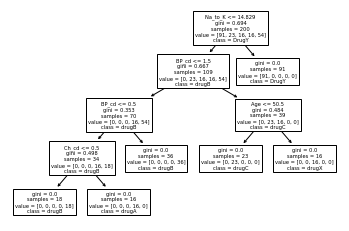

In [151]:
plot_tree(dt, feature_names=x_var, class_names=Q3.Drug.unique())

In [152]:
# export_text(dt)

'|--- feature_1 <= 14.83\n|   |--- feature_3 <= 1.50\n|   |   |--- feature_3 <= 0.50\n|   |   |   |--- feature_4 <= 0.50\n|   |   |   |   |--- class: drugX\n|   |   |   |--- feature_4 >  0.50\n|   |   |   |   |--- class: drugC\n|   |   |--- feature_3 >  0.50\n|   |   |   |--- class: drugX\n|   |--- feature_3 >  1.50\n|   |   |--- feature_0 <= 50.50\n|   |   |   |--- class: drugA\n|   |   |--- feature_0 >  50.50\n|   |   |   |--- class: drugB\n|--- feature_1 >  14.83\n|   |--- class: DrugY\n'

In [153]:
export_text(dt, feature_names=x_var)

'|--- Na_to_K <= 14.83\n|   |--- BP_cd <= 1.50\n|   |   |--- BP_cd <= 0.50\n|   |   |   |--- Ch_cd <= 0.50\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.50\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.50\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.50\n|   |   |--- Age <= 50.50\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.50\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.83\n|   |--- class: DrugY\n'

In [154]:
export_text(dt, feature_names=x_var, decimals=3)

'|--- Na_to_K <= 14.829\n|   |--- BP_cd <= 1.500\n|   |   |--- BP_cd <= 0.500\n|   |   |   |--- Ch_cd <= 0.500\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.500\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.500\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.500\n|   |   |--- Age <= 50.500\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.500\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.829\n|   |--- class: DrugY\n'

In [ ]:
# (정답) Na_to_K , 14.829

# Dataset_03

In [ ]:
# =============================================================================
# =============================================================================
# # 문제 03 유형(DataSet_03.csv 이용)
# 
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

## 1. Outlier

In [ ]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================

In [ ]:
import pandas as pd

In [161]:
dataset3 = pd.read_csv('Dataset/Dataset_03.csv')

In [163]:
dataset3.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [165]:
dataset3.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [166]:
dataset3.shape

(5001, 8)

In [174]:
Q1 = dataset3.copy()

In [172]:
# Q1.forehead_ratio = Q1.forehead_width_cm/Q1.forehead_height_cm
# Q1.forehead_ratio

C:\Users\Boram Yun\anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0       1.934426
1       2.592593
2       1.873016
3       2.360656
4       2.288136
          ...   
4996    2.666667
4997    2.203704
4998    2.263158
4999    2.129032
5000    2.851852
Length: 5001, dtype: float64

### 해설

In [ ]:
# 변수 생성(forehead_ratio)
# 생성된 변수 기준으로 평균과 표준편차 계산
# 평균 - 3*표준편차(LL), 평균 + 3*표준편차(UU) : 벗어난 이상치

In [ ]:
forehead_ratio = forehead_width_cm/forehead_height_cm

In [175]:
Q1['forehead_ratio'] = Q1['forehead_width_cm'] / Q1['forehead_height_cm']
Q1['forehead_ratio']

0       1.934426
1       2.592593
2       1.873016
3       2.360656
4       2.288136
          ...   
4996    2.666667
4997    2.203704
4998    2.263158
4999    2.129032
5000    2.851852
Name: forehead_ratio, Length: 5001, dtype: float64

In [176]:
m1 = Q1['forehead_ratio'].mean()
sd1 = Q1['forehead_ratio'].std()

In [177]:
LL = m1 - (3*sd1)
UU = m1 + (3*sd1)

In [178]:
Q1_out = Q1[(Q1['forehead_ratio'] < LL) | (Q1['forehead_ratio'] > UU)]
len(Q1_out)

3

In [ ]:
# (정답) 3

## 2. t-test

In [ ]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

In [ ]:
# 버전 차이 conf_level=0.99 현재 미지원

### 해설

In [ ]:
# 반복 측정 - 동일한 환경에서 측정
# 개인차

# 독립 / 대응 
# 독립 - 평균과 분산을 고려 (등분산, 이분산 고려)
# 대응 - 분산을 고려하지 않음 (쌍으로, 대응이 되도록)

In [ ]:
# 독립인 두 집단 간의 평균 차이 검정

In [179]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
# 독립 1표본, 독립 2표본, 대응

In [181]:
# data filtering 후 
ttest_ind(Q1.forehead_ratio[Q1.gender=='Male'], 
          Q1.forehead_ratio[Q1.gender=='Female'], 
          equal_var=False) 
          # conf_level=0.99)

# Spyder에서 ctrl + ttest_ind 누르면 source 
# -> https://github.com/scipy/scipy/blob/v1.7.1/scipy/stats/stats.py#L5879-L6146

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [ ]:
# 신뢰수준에 따라 pvalue 해석

In [ ]:
# (정답) 2.999, Y

## 3. Logistic Regression

In [ ]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

### 해설

In [ ]:
# 데이터셋 분리(seed 체크)
# 모델 만들 때는 학습용 데이터셋 활용
# 검정 시 테스트용 데이터셋 활용

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn import metrics
from sklearn.metrics import classification_report, precision_score

In [183]:
# 데이터 하나 넣으면 두 개로 나옴
train, test = train_test_split(dataset3, test_size=0.3, random_state=123)

In [185]:
model1 = LogisticRegression().fit(train.drop(columns='gender'), 
                                  train.gender)

In [188]:
pred = model1.predict(test.drop(columns='gender'))
pred

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [194]:
pred_p = model1.predict_proba(test.drop(columns='gender'))
pred_p

array([[2.13366044e-02, 9.78663396e-01],
       [8.97496054e-05, 9.99910250e-01],
       [2.54440411e-01, 7.45559589e-01],
       ...,
       [9.63308173e-01, 3.66918274e-02],
       [8.55088606e-05, 9.99914491e-01],
       [1.37076239e-04, 9.99862924e-01]])

In [190]:
classification_report(test.gender, pred)

'              precision    recall  f1-score   support\n\n      Female       0.97      0.96      0.96       743\n        Male       0.96      0.97      0.97       758\n\n    accuracy                           0.97      1501\n   macro avg       0.97      0.97      0.97      1501\nweighted avg       0.97      0.97      0.97      1501\n'

In [191]:
print(classification_report(test.gender, pred))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [192]:
precision_score(test.gender, pred, pos_label='Male')

0.9596354166666666

In [195]:
(pred_p[:,1] > 0.7).sum()

735

# Dataset_04

In [196]:
# =============================================================================
# =============================================================================
# # 문제 04 유형(DataSet_04.csv 이용)
#
#구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

# 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
# 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
# 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

# 컬 럼 / 정 의 / Type
# LOCATION / 국가명 / String
# SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
# TIME / 연도 (1990 ~ 2026) / Integer
# Value / 1인당 육류 소비량 (KG) / Double
# =============================================================================
# =============================================================================

# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# from scipy.stats import ttest_rel
# #3
# from sklearn.linear_model import LinearRegression

## 1. Correlation

In [ ]:
# =============================================================================
# 1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
# 확인하려고 한다. 
# - 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
# - 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
# 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오. 
# (답안 예시) 0.55
# =============================================================================

In [197]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
from sklearn.linear_model import LinearRegression

In [198]:
dataset4 = pd.read_csv('Dataset/dataset_04.csv')

In [200]:
dataset4.dtypes

LOCATION     object
SUBJECT      object
TIME          int64
Value       float64
dtype: object

In [202]:
dataset4.shape

(6718, 4)

### 해설

In [199]:
dataset4.columns

Index(['LOCATION', 'SUBJECT', 'TIME', 'Value'], dtype='object')

In [207]:
Q1 = dataset4[dataset4.LOCATION == 'KOR']

In [212]:
# 소문자 -> Spyder variable explore에서 table 출력 위해
q1_out = pd.pivot_table(data=Q1, index='TIME', 
                        values='Value', # columns= 여러 개
                        aggfunc='sum')
q1_out

,Value
TIME,
1990,5.774255
1991,21.911207
1992,26.901769
1993,26.938255
1994,27.877341
1995,30.042035
1996,31.928922
1997,32.002991
1998,30.009057


In [213]:
q1_out.reset_index(inplace=True)
# q1_out = q1_out.reset_index()

In [214]:
q1_out.corr()

,TIME,Value
TIME,1.000000,0.960124
Value,0.960124,1.000000


In [215]:
q1_out.corr()['Value']['TIME']

0.9601244896033334

In [216]:
q1_out.corr()['TIME']['Value']

0.9601244896033334

## 2. 

In [ ]:
# =============================================================================
# 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별
# 소비량에 평균 차이가 있는지 분석하고자 한다.
# - 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
# - 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
# 적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP
# =============================================================================

### 해설

In [221]:
q2 = dataset4[dataset4.LOCATION.isin(['KOR', 'JPN'])] # | or 써도 가능
len(dataset4), len(q2)                                     

(6718, 294)

In [224]:
q2_out = pd.pivot_table(data=q2, index=['TIME', 'SUBJECT'], 
                    columns=['LOCATION'],
                    values='Value')
q2_out

LOCATION            JPN        KOR
TIME SUBJECT                      
1990 BEEF      6.111035        NaN
     PIG      13.219006        NaN
     POULTRY  12.844865   5.570102
     SHEEP     0.756696   0.204153
1991 BEEF      6.517055   5.085481
...                 ...        ...
2025 SHEEP     0.125060   0.201451
2026 BEEF      6.844875  10.737425
     PIG      15.544018  29.544063
     POULTRY  14.768340  17.907865
     SHEEP     0.122136   0.202656

[148 rows x 2 columns]

In [225]:
q2_out = q2_out.dropna()
q2_out = q2_out.reset_index()
q2_out

LOCATION,TIME,SUBJECT,JPN,KOR
0,1990,POULTRY,12.844865,5.570102
1,1990,SHEEP,0.756696,0.204153
2,1991,BEEF,6.517055,5.085481
3,1991,PIG,13.239267,9.930182
4,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
141,2025,SHEEP,0.125060,0.201451
142,2026,BEEF,6.844875,10.737425
143,2026,PIG,15.544018,29.544063
144,2026,POULTRY,14.768340,17.907865


In [228]:
sub_list = q2_out.SUBJECT.unique()
sub_list

array(['POULTRY', 'SHEEP', 'BEEF', 'PIG'], dtype=object)

In [231]:
from scipy.stats import ttest_rel

q2_out2=[]
for i in sub_list:
    temp = q2_out[q2_out.SUBJECT == i]
    pvalue = ttest_rel(temp['KOR'], temp['JPN']).pvalue
    q2_out2 = q2_out2 + [[i, pvalue]]
    
q2_out2 = pd.DataFrame(q2_out2, columns=['sub', 'pvalue'])
q2_out2

,sub,pvalue
0,POULTRY,4.690626e-01
1,SHEEP,4.346643e-05
2,BEEF,3.541916e-04
3,PIG,1.063500e-10


In [232]:
q2_out2[q2_out2.pvalue >= 0.05]

,sub,pvalue
0,POULTRY,0.469063


In [ ]:
# (정답) POULTRY

## 3. 

In [ ]:
# =============================================================================
# 3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
# 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
# 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
# (MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
# (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))
# 
# =============================================================================

### 해설

In [233]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score, mean_absolute_error 

In [235]:
q3 = q2_out.drop(columns='JPN')
q3

LOCATION,TIME,SUBJECT,KOR
0,1990,POULTRY,5.570102
1,1990,SHEEP,0.204153
2,1991,BEEF,5.085481
3,1991,PIG,9.930182
4,1991,POULTRY,6.738203
...,...,...,...
141,2025,SHEEP,0.201451
142,2026,BEEF,10.737425
143,2026,PIG,29.544063
144,2026,POULTRY,17.907865


In [236]:
q3['TIME'].shape, q3[['TIME']].shape

((146,), (146, 1))

In [237]:
q3_out = []
sub_list = q3.SUBJECT.unique()

for i in sub_list:
    temp = q3[q3.SUBJECT == i]
    lm = LinearRegression().fit(temp[['TIME']], temp.KOR) 
    # 사이킷런 기본적으로 X(입력변수) 2차원 구조 열 벡터로 입력
    r2_score = lm.score(temp[['TIME']], temp.KOR)
    q3_out = q3_out + [[i, r2_score]]
    
    # .predict -> r2_score

q3_out = pd.DataFrame(q3_out, columns=['sub', 'r2_score'])
q3_out

,sub,r2_score
0,POULTRY,0.951498
1,SHEEP,0.004083
2,BEEF,0.835456
3,PIG,0.940681


In [ ]:
# MAPE = Σ ( | y - y ̂ | / y ) * 100/n 

In [238]:
temp = q3[q3.SUBJECT == 'POULTRY']
lm2 = LinearRegression().fit(temp[['TIME']], temp.KOR)
pred = lm2.predict(temp[['TIME']])

In [239]:
mape = (abs(temp.KOR - pred) / temp.KOR).sum() * 100/len(temp) # .abs()

In [240]:
print(mape)

5.783357902874552
